=== PHÂN TÍCH DỮ LIỆU PHỔ RUNG ===
Số điểm dữ liệu: 86
Shape dữ liệu: (86,)
Giá trị min: 4.09e-18
Giá trị max: 4.61e-03
Trung bình: 1.07e-03
Độ lệch chuẩn: 8.07e-04
Hệ số biến thiên (CV): 0.75
P-value kiểm tra phân phối chuẩn: 3.99e-15
Số outliers: 5

=== KHUYẾN NGHỊ NORMALIZATION ===
1. Robust Normalization - do có nhiều outliers
2. RMS Normalization - phù hợp cho tín hiệu rung động
3. Energy Normalization - bảo toàn năng lượng tín hiệu
4. Unit Vector Normalization - chuẩn hóa độ lớn vector
5. Logarithmic Normalization - xử lý dải động lớn


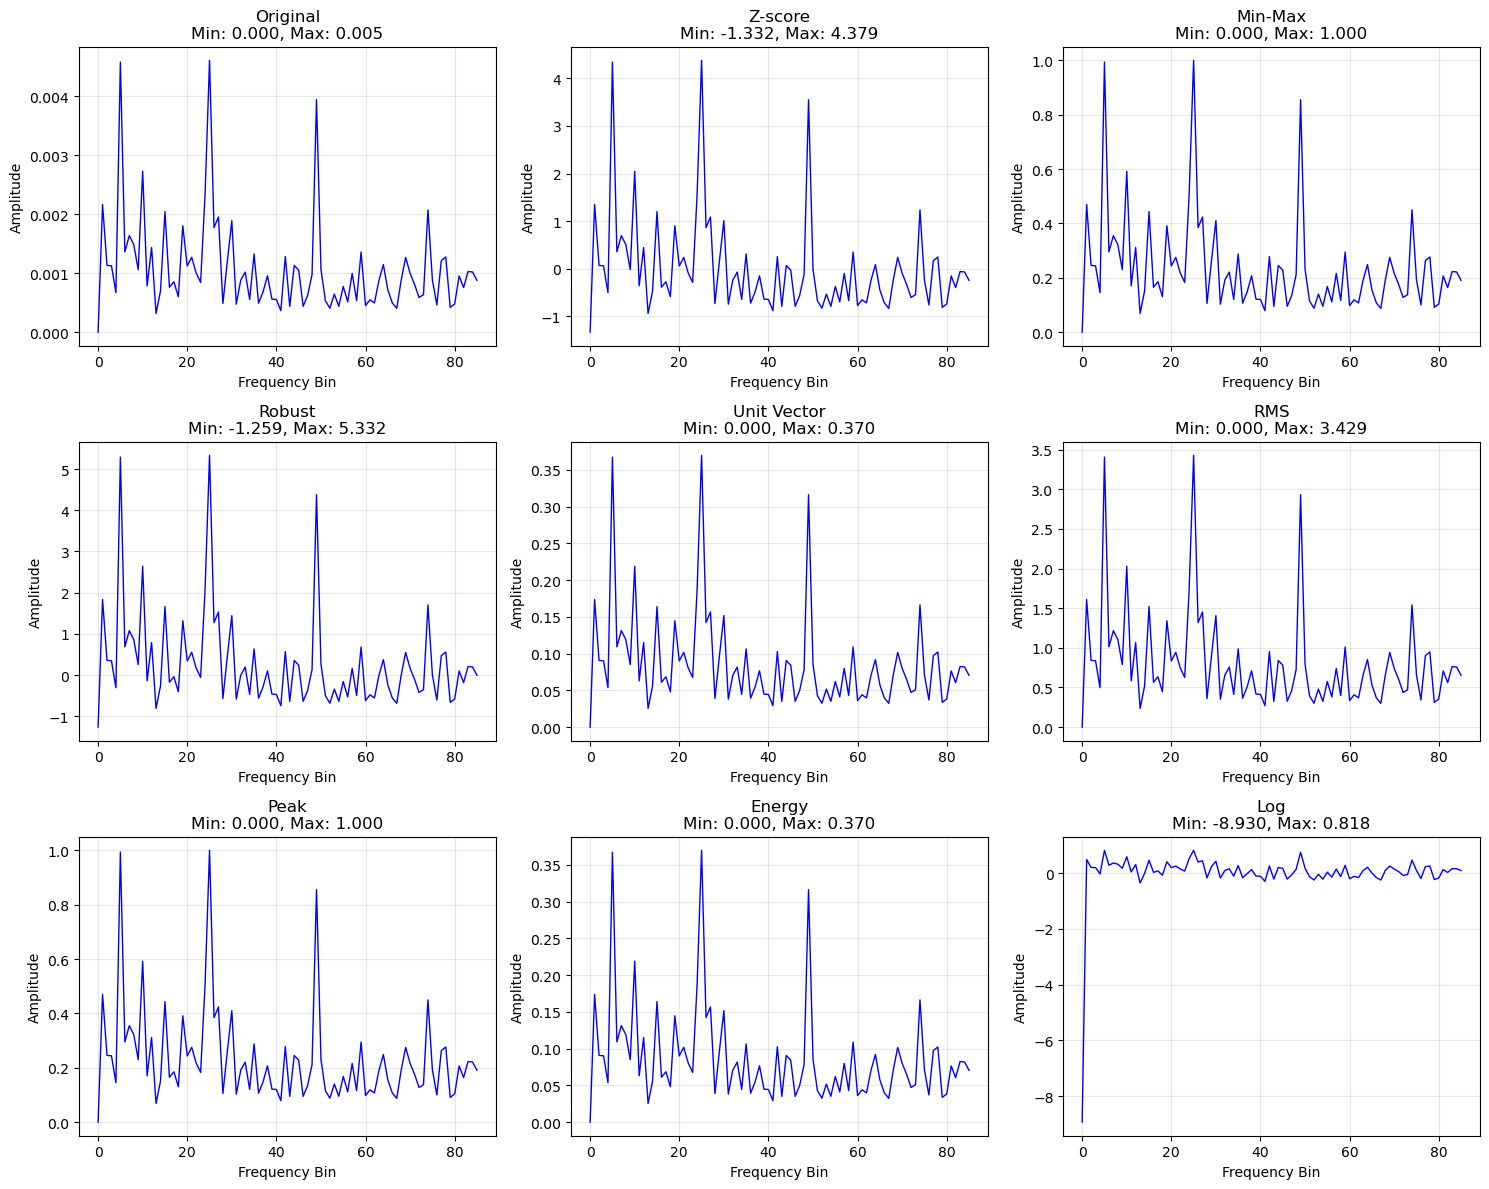


=== SO SÁNH THỐNG KÊ CÁC PHƯƠNG PHÁP ===
Method          Mean       Std        Min        Max       
------------------------------------------------------------
Original        0.001      0.001      0.000      0.005     
Z-score         0.000      1.000      -1.332     4.379     
Min-Max         0.233      0.175      0.000      1.000     
Robust          0.278      1.154      -1.259     5.332     
Unit Vector     0.086      0.065      0.000      0.370     
RMS             0.800      0.600      0.000      3.429     
Peak            0.233      0.175      0.000      1.000     
Energy          0.086      0.065      0.000      0.370     
Log             -0.000     1.000      -8.930     0.818     

=== CÁCH SỬ DỤNG VỚI DỮ LIỆU ĐA CHIỀU ===
# Ví dụ sử dụng với X_train shape (n_samples, n_features):
# recommendations = analyze_and_recommend(X_train)
# processed_methods = process_multidimensional_data(X_train)

=== KHUYẾN NGHỊ CỤ THỂ CHO FAULT DETECTION ===
1. RMS Normalization: Tốt nhất cho 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import Normalizer, PowerTransformer
import scipy.stats as stats

X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

# Dữ liệu phổ rung từ CWRU
spectrum_data = X_train[1000]

class VibrationNormalizer:
    def __init__(self, data):
        self.data = data.reshape(-1, 1)  # Reshape cho sklearn
        self.original_shape = data.shape
        
    def z_score_normalization(self):
        """Z-score normalization (Standardization)
        Phù hợp khi dữ liệu có phân phối gần chuẩn"""
        scaler = StandardScaler()
        normalized = scaler.fit_transform(self.data)
        return normalized.flatten(), scaler
    
    def min_max_normalization(self, feature_range=(0, 1)):
        """Min-Max normalization
        Đưa dữ liệu về khoảng [0,1] hoặc [-1,1]"""
        scaler = MinMaxScaler(feature_range=feature_range)
        normalized = scaler.fit_transform(self.data)
        return normalized.flatten(), scaler
    
    def robust_normalization(self):
        """Robust normalization sử dụng median và IQR
        Ít bị ảnh hưởng bởi outliers"""
        scaler = RobustScaler()
        normalized = scaler.fit_transform(self.data)
        return normalized.flatten(), scaler
    
    def unit_vector_normalization(self, norm='l2'):
        """Unit vector normalization
        Chuẩn hóa vector về độ dài đơn vị"""
        normalizer = Normalizer(norm=norm)
        normalized = normalizer.fit_transform(self.data.reshape(1, -1))
        return normalized.flatten(), normalizer
    
    def power_normalization(self):
        """Power transformation (Box-Cox, Yeo-Johnson)
        Biến đổi để dữ liệu gần phân phối chuẩn hơn"""
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
        normalized = transformer.fit_transform(self.data)
        return normalized.flatten(), transformer
    
    def rms_normalization(self):
        """RMS normalization - phù hợp cho tín hiệu rung"""
        rms_value = np.sqrt(np.mean(self.data**2))
        normalized = self.data.flatten() / rms_value
        return normalized, rms_value
    
    def peak_normalization(self):
        """Peak normalization - chia cho giá trị đỉnh"""
        peak_value = np.max(np.abs(self.data))
        normalized = self.data.flatten() / peak_value
        return normalized, peak_value
    
    def energy_normalization(self):
        """Energy normalization - chia cho tổng năng lượng"""
        energy = np.sum(self.data**2)
        normalized = self.data.flatten() / np.sqrt(energy)
        return normalized, energy
    
    def logarithmic_normalization(self, epsilon=1e-12):
        """Logarithmic normalization cho phổ tần số"""
        # Thêm epsilon để tránh log(0)
        log_data = np.log10(self.data + epsilon)
        # Chuẩn hóa log data
        normalized = (log_data - np.mean(log_data)) / np.std(log_data)
        return normalized.flatten(), (np.mean(log_data), np.std(log_data))

def analyze_and_recommend(data):
    """Phân tích dữ liệu và đưa ra khuyến nghị"""
    # Flatten data nếu là multidimensional
    if data.ndim > 1:
        data_flat = data.flatten()
    else:
        data_flat = data
    
    print("=== PHÂN TÍCH DỮ LIỆU PHỔ RUNG ===")
    print(f"Số điểm dữ liệu: {len(data_flat)}")
    print(f"Shape dữ liệu: {data.shape}")
    print(f"Giá trị min: {float(np.min(data_flat)):.2e}")
    print(f"Giá trị max: {float(np.max(data_flat)):.2e}")
    print(f"Trung bình: {float(np.mean(data_flat)):.2e}")
    print(f"Độ lệch chuẩn: {float(np.std(data_flat)):.2e}")
    print(f"Hệ số biến thiên (CV): {float(np.std(data_flat)/np.mean(data_flat)):.2f}")
    
    # Kiểm tra tính chuẩn của phân phối
    try:
        _, p_value = stats.normaltest(data_flat)
        print(f"P-value kiểm tra phân phối chuẩn: {float(p_value):.2e}")
    except:
        p_value = 0.0  # Default value nếu test fail
        print("Không thể thực hiện kiểm tra phân phối chuẩn")
    
    # Kiểm tra outliers
    Q1 = float(np.percentile(data_flat, 25))
    Q3 = float(np.percentile(data_flat, 75))
    IQR = Q3 - Q1
    outliers = data_flat[(data_flat < Q1 - 1.5*IQR) | (data_flat > Q3 + 1.5*IQR)]
    print(f"Số outliers: {len(outliers)}")
    
    print("\n=== KHUYẾN NGHỊ NORMALIZATION ===")
    
    # Khuyến nghị dựa trên đặc điểm dữ liệu
    recommendations = []
    
    if len(outliers) > len(data_flat) * 0.05:  # >5% outliers
        recommendations.append("Robust Normalization - do có nhiều outliers")
    
    if p_value > 0.05:  # Phân phối gần chuẩn
        recommendations.append("Z-score Normalization - phân phối gần chuẩn")
    
    # Luôn khuyến nghị các phương pháp phù hợp cho tín hiệu rung
    recommendations.extend([
        "RMS Normalization - phù hợp cho tín hiệu rung động",
        "Energy Normalization - bảo toàn năng lượng tín hiệu",
        "Unit Vector Normalization - chuẩn hóa độ lớn vector"
    ])
    
    # Nếu có giá trị rất nhỏ gần 0
    if float(np.min(data_flat)) < 1e-15:
        recommendations.append("Logarithmic Normalization - xử lý dải động lớn")
    
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")
    
    return recommendations

# Khởi tạo normalizer
normalizer = VibrationNormalizer(spectrum_data)

# Phân tích dữ liệu
recommendations = analyze_and_recommend(spectrum_data)

# Thực hiện các phương pháp normalization
methods = {
    'Original': spectrum_data,
    'Z-score': normalizer.z_score_normalization()[0],
    'Min-Max': normalizer.min_max_normalization()[0],
    'Robust': normalizer.robust_normalization()[0],
    'Unit Vector': normalizer.unit_vector_normalization()[0],
    'RMS': normalizer.rms_normalization()[0],
    'Peak': normalizer.peak_normalization()[0],
    'Energy': normalizer.energy_normalization()[0],
    'Log': normalizer.logarithmic_normalization()[0]
}

# Hàm để xử lý dữ liệu đa chiều
def process_multidimensional_data(X_data):
    """Xử lý dữ liệu đa chiều cho normalization"""
    if X_data.ndim == 1:
        return X_data
    elif X_data.ndim == 2:
        # Nếu là ma trận 2D, xử lý theo từng sample
        processed_methods = {}
        for name in ['Z-score', 'Min-Max', 'Robust', 'Unit Vector', 'RMS', 'Peak', 'Energy', 'Log']:
            processed_data = []
            for sample in X_data:
                norm = VibrationNormalizer(sample)
                if name == 'Z-score':
                    processed_data.append(norm.z_score_normalization()[0])
                elif name == 'Min-Max':
                    processed_data.append(norm.min_max_normalization()[0])
                elif name == 'Robust':
                    processed_data.append(norm.robust_normalization()[0])
                elif name == 'Unit Vector':
                    processed_data.append(norm.unit_vector_normalization()[0])
                elif name == 'RMS':
                    processed_data.append(norm.rms_normalization()[0])
                elif name == 'Peak':
                    processed_data.append(norm.peak_normalization()[0])
                elif name == 'Energy':
                    processed_data.append(norm.energy_normalization()[0])
                elif name == 'Log':
                    processed_data.append(norm.logarithmic_normalization()[0])
            
            processed_methods[name] = np.array(processed_data)
        
        processed_methods['Original'] = X_data
        return processed_methods
    else:
        raise ValueError(f"Unsupported data shape: {X_data.shape}")

# Visualize các phương pháp normalization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, (name, data) in enumerate(methods.items()):
    axes[i].plot(data, 'b-', linewidth=1)
    axes[i].set_title(f'{name}\nMin: {np.min(data):.3f}, Max: {np.max(data):.3f}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('Frequency Bin')
    axes[i].set_ylabel('Amplitude')

plt.tight_layout()
plt.savefig('normalization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# So sánh thống kê
print("\n=== SO SÁNH THỐNG KÊ CÁC PHƯƠNG PHÁP ===")
print(f"{'Method':<15} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
print("-" * 60)
for name, data in methods.items():
    data_flat = data.flatten() if hasattr(data, 'flatten') else data
    print(f"{name:<15} {float(np.mean(data_flat)):<10.3f} {float(np.std(data_flat)):<10.3f} "
          f"{float(np.min(data_flat)):<10.3f} {float(np.max(data_flat)):<10.3f}")

print("\n=== CÁCH SỬ DỤNG VỚI DỮ LIỆU ĐA CHIỀU ===")
print("# Ví dụ sử dụng với X_train shape (n_samples, n_features):")
print("# recommendations = analyze_and_recommend(X_train)")
print("# processed_methods = process_multidimensional_data(X_train)")

print("\n=== KHUYẾN NGHỊ CỤ THỂ CHO FAULT DETECTION ===")
print("1. RMS Normalization: Tốt nhất cho phân loại fault patterns")
print("2. Z-score + Robust: Kết hợp để xử lý outliers")
print("3. Energy Normalization: Bảo toàn đặc trưng tần số")
print("4. Min-Max [0,1]: Phù hợp cho neural networks")
print("5. Unit Vector: Tập trung vào shape thay vì magnitude")